<a href="https://colab.research.google.com/github/hossain10022/Medical-Image-Analysis-Using-Artificial-Intelligence-X-ray-/blob/main/Medical_Image_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import save_img
from keras.preprocessing import image
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,UpSampling2D
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras import layers, models
from math import log10, sqrt
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

# Path to the ZIP file
zip_path = '/content/data.zip'

# Read the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    train_images = sorted(zip_ref.namelist())  # Get a sorted list of file names
    print(train_images)


['Dataset/1.jpg', 'Dataset/10.jpg', 'Dataset/100.jpg', 'Dataset/101.jpg', 'Dataset/102.jpg', 'Dataset/103.jpg', 'Dataset/104.jpg', 'Dataset/105.jpg', 'Dataset/106.jpg', 'Dataset/107.jpg', 'Dataset/108.jpg', 'Dataset/109.jpg', 'Dataset/11.jpg', 'Dataset/110.jpg', 'Dataset/111.jpg', 'Dataset/112.jpg', 'Dataset/113.jpg', 'Dataset/114.jpg', 'Dataset/115.jpg', 'Dataset/116.jpg', 'Dataset/117.jpg', 'Dataset/118.jpg', 'Dataset/119.jpg', 'Dataset/12.jpg', 'Dataset/120.jpg', 'Dataset/13.jpg', 'Dataset/14.jpg', 'Dataset/15.jpg', 'Dataset/16.jpg', 'Dataset/17.jpg', 'Dataset/18.jpg', 'Dataset/19.jpg', 'Dataset/2.jpg', 'Dataset/20.jpg', 'Dataset/21.jpg', 'Dataset/22.jpg', 'Dataset/23.jpg', 'Dataset/24.jpg', 'Dataset/25.jpg', 'Dataset/26.jpg', 'Dataset/27.jpg', 'Dataset/28.jpg', 'Dataset/29.jpg', 'Dataset/3.jpg', 'Dataset/30.jpg', 'Dataset/31.jpg', 'Dataset/32.jpg', 'Dataset/33.jpg', 'Dataset/34.jpg', 'Dataset/35.jpg', 'Dataset/36.jpg', 'Dataset/37.jpg', 'Dataset/38.jpg', 'Dataset/39.jpg', 'Dataset/

In [ ]:
train_image = []

In [ ]:
import zipfile
from tensorflow.keras.preprocessing import image
import numpy as np
import io

# Path to the ZIP file
zip_path = '/content/data.zip'

train_image = []

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for im in train_images:  # train_images contains the names of files in the ZIP
        with zip_ref.open(im) as file:
            img = image.load_img(io.BytesIO(file.read()), target_size=(128, 128), color_mode='grayscale')
            img = image.img_to_array(img)
            img = img / 255.0
            train_image.append(img)

train_df = np.array(train_image)
print("Shape of training data:", train_df.shape)


Shape of training data: (120, 128, 128, 1)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.ion()  # Turn on interactive mode




In [ ]:
def show_img(dataset):
    f, ax = plt.subplots(1, 5)
    f.set_size_inches(40, 20)
    for i in range(5):
        # Ensure correct shape for grayscale images
        if dataset[i].shape[-1] == 1:  # Grayscale
            ax[i].imshow(dataset[i].reshape(128, 128), cmap='gray')
        else:  # RGB
            ax[i].imshow(dataset[i])
    plt.show()


In [ ]:
def show_img(dataset):
    f, ax = plt.subplots(1, 5)
    f.set_size_inches(40, 20)
    for i in range(5):
        ax[i].imshow(dataset[i].reshape(128, 128), cmap='gray')
        ax[i].axis('off')  # Turn off axes
    plt.show(block=True)


Dataset shape: (120, 128, 128, 1)


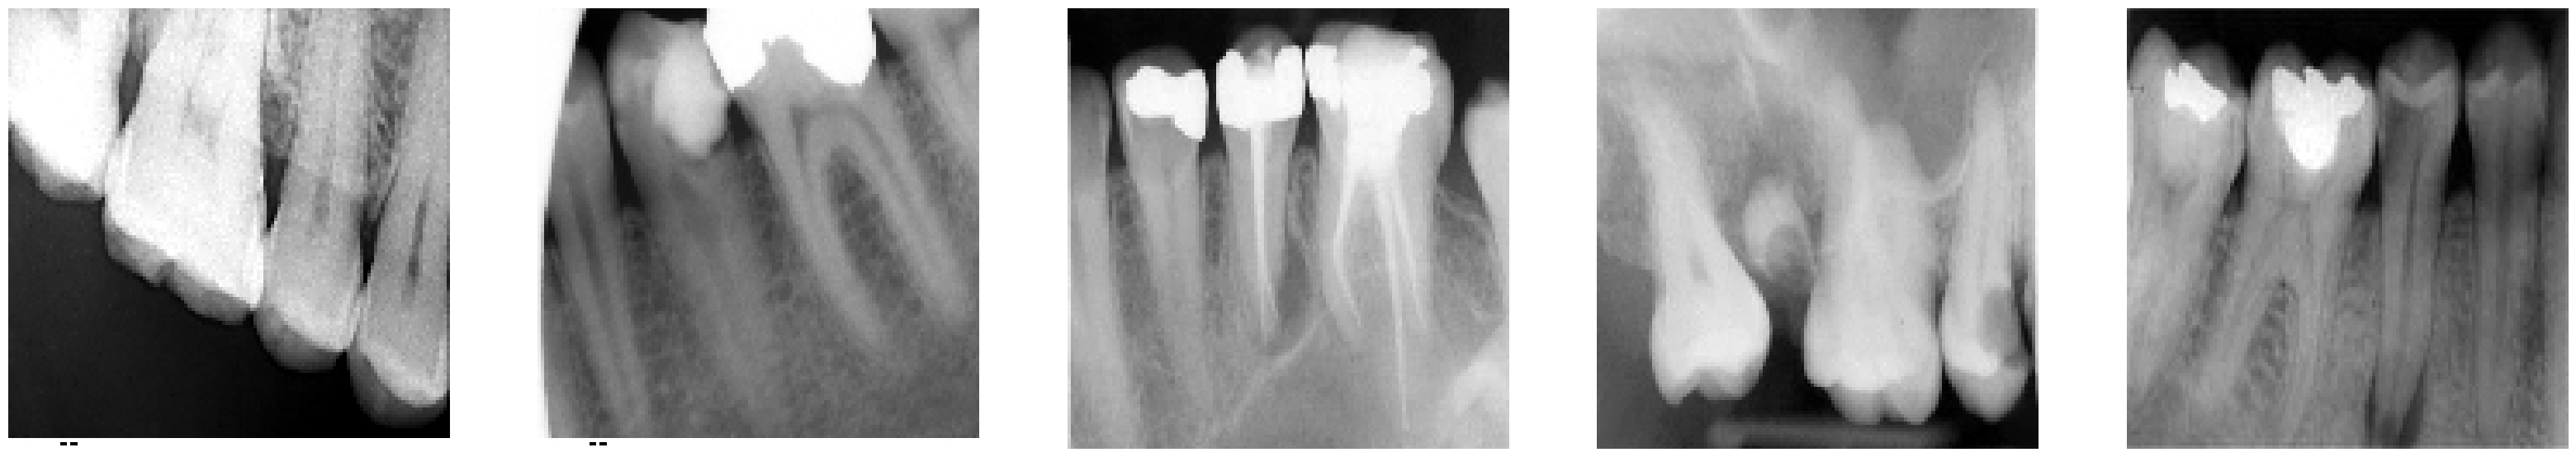

In [ ]:
def show_img(dataset):
    print(f"Dataset shape: {dataset.shape}")  # Debug the dataset shape
    f, ax = plt.subplots(1, 5)
    f.set_size_inches(40, 20)
    for i in range(5):
        ax[i].imshow(dataset[i].reshape(128, 128), cmap='gray')
        ax[i].axis('off')
    plt.show()

# Call the function
show_img(train_df)


In [ ]:
def show_img(dataset):
    f, ax = plt.subplots(1, 5)
    f.set_size_inches(40, 20)
    for i in range(5):
        ax[i].imshow(dataset[i].reshape(128, 128), cmap='gray')
        ax[i].axis('off')
    plt.savefig('output_plot.png')  # Save plot to a file
    print("Plot saved as 'output_plot.png'")
    plt.show()


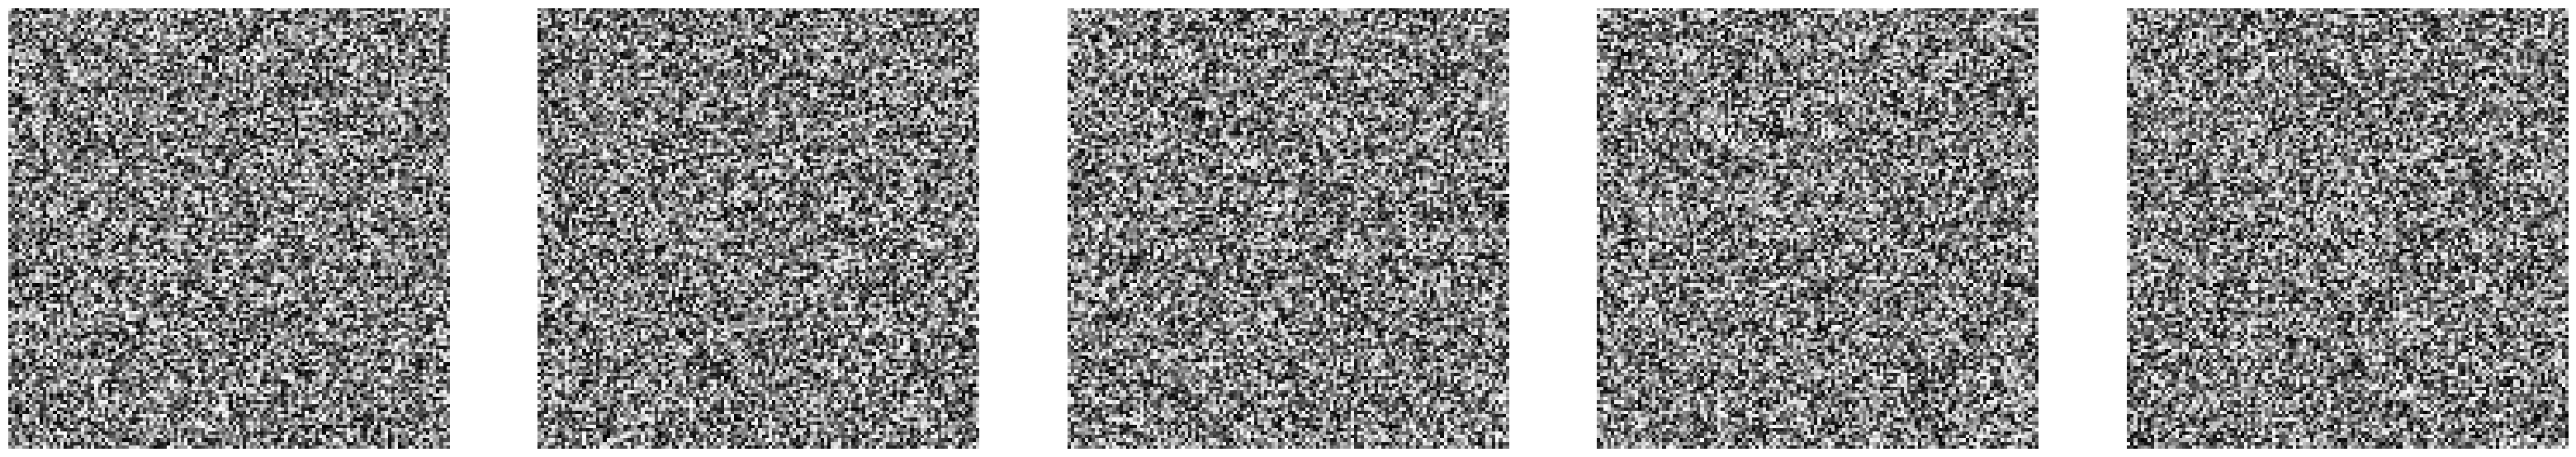

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Test a simple plot
test_data = np.random.rand(5, 128, 128)
def test_plot(data):
    f, ax = plt.subplots(1, 5)
    f.set_size_inches(40, 20)
    for i in range(5):
        ax[i].imshow(data[i], cmap='gray')
        ax[i].axis('off')
    plt.show()

test_plot(test_data)


In [ ]:
def add_noise(image):
    row,col,ch= image.shape
    mean, sigma = 0, 0.8
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss*0.05
    return noisy

In [ ]:
noised_df= []

In [ ]:
for img in train_df:
    noisy= add_noise(img)
    noised_df.append(noisy)
noised_df= np.array(noised_df)

Plot saved as 'output_plot.png'


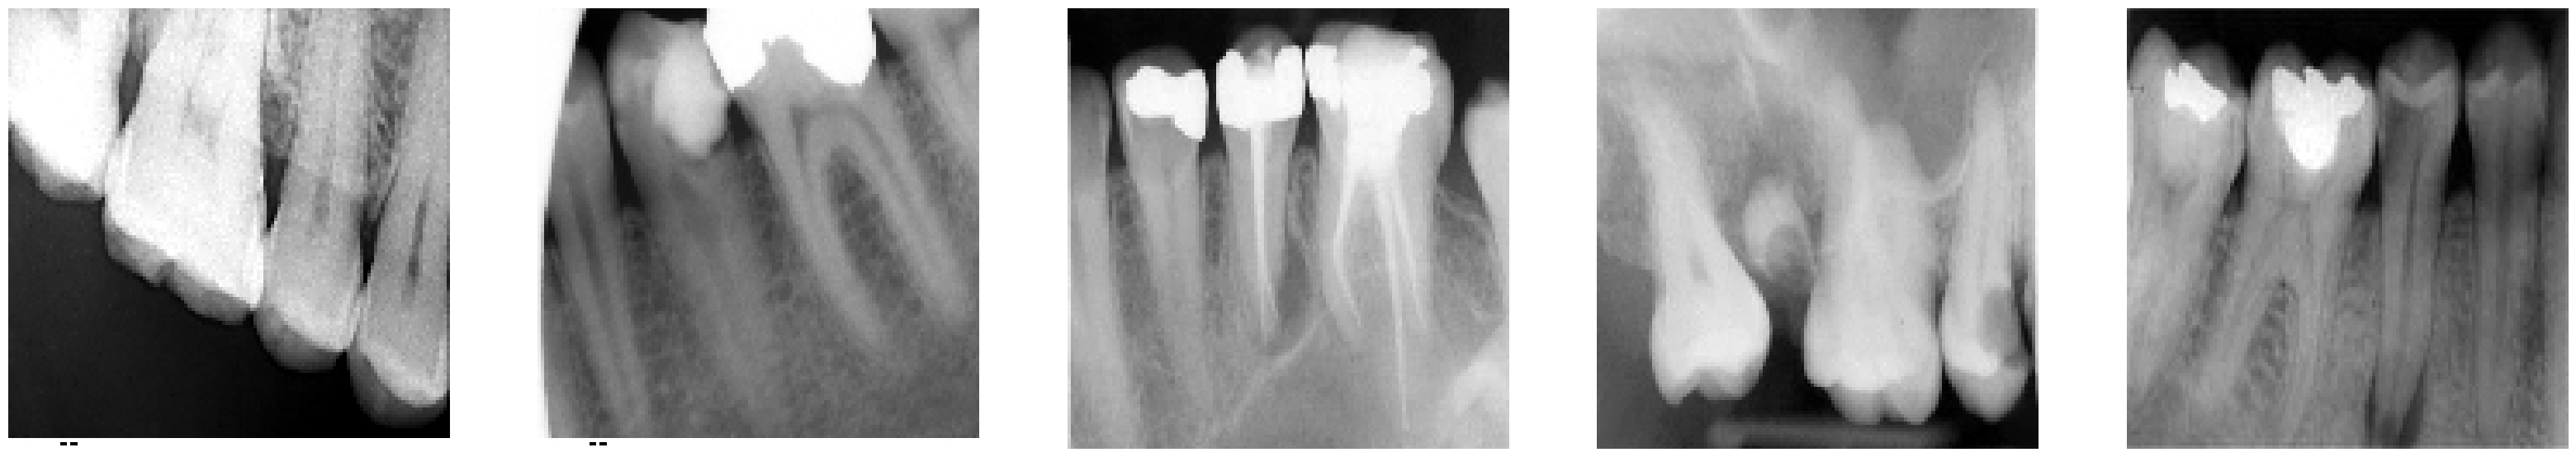

In [ ]:
show_img(train_df)

Plot saved as 'output_plot.png'


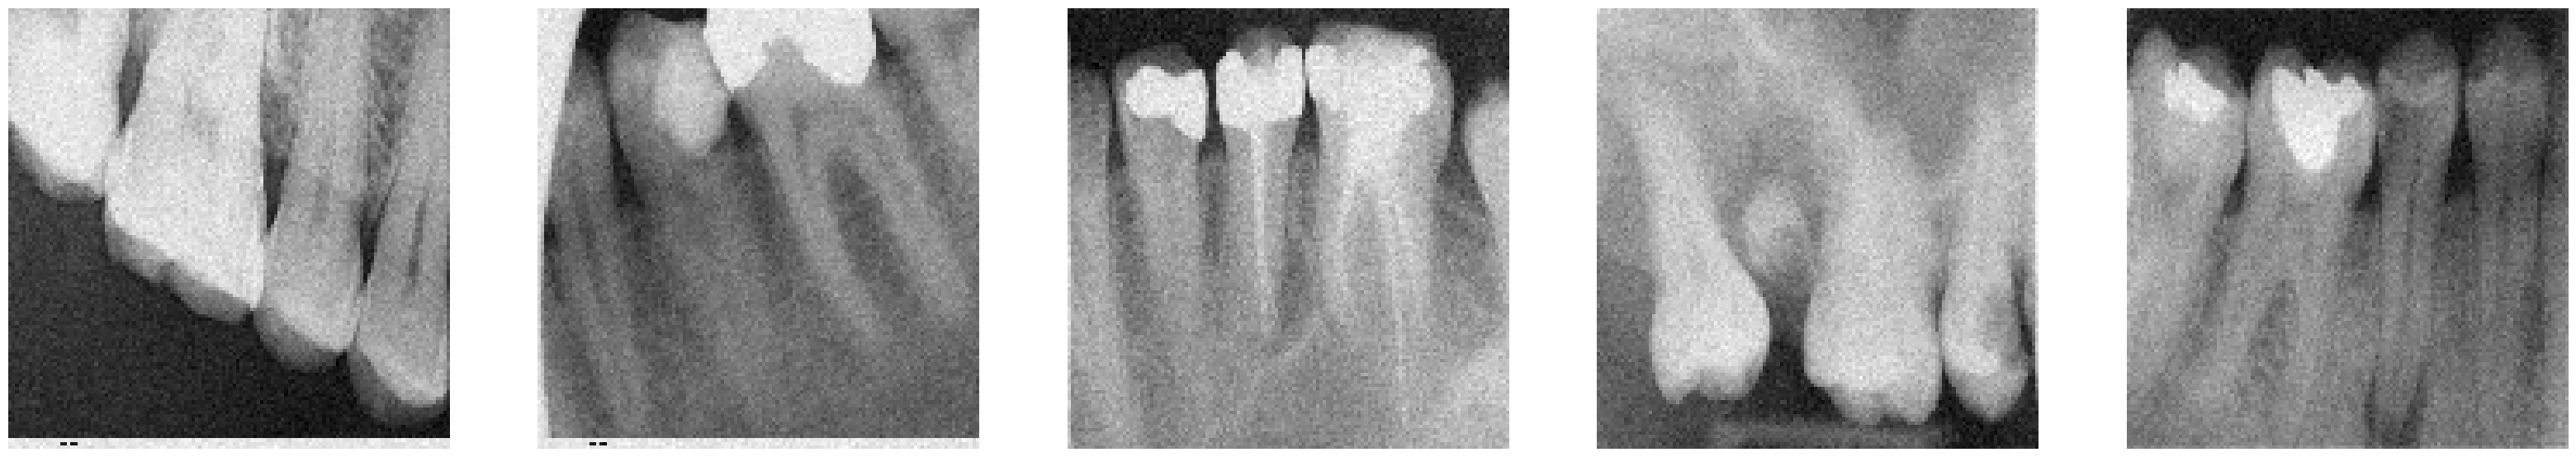

In [ ]:
show_img(noised_df)

In [ ]:
xnoised= noised_df[0:100]
xtest= noised_df[100:]

In [ ]:
class UNet(tf.keras.Model):
    def __init__(self):
        super(UNet, self).__init__()

        # Encoder Blocks
        self.enc1 = models.Sequential([
            layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(None, None, 1)),
            layers.Conv2D(16, (3, 3), padding='same', activation='relu')
        ])
        self.pool1 = layers.MaxPooling2D((2, 2))

        self.enc2 = models.Sequential([
            layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
            layers.Conv2D(32, (3, 3), padding='same', activation='relu')
        ])
        self.pool2 = layers.MaxPooling2D((2, 2))

        self.enc3 = models.Sequential([
            layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
            layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        ])
        self.pool3 = layers.MaxPooling2D((2, 2))

        # Bottleneck
        self.bottleneck = models.Sequential([
            layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
            layers.Conv2D(128, (3, 3), padding='same', activation='relu')
        ])

        # Decoder Blocks
        self.upconv3 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')
        self.dec3 = models.Sequential([
            layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
            layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        ])

        self.upconv2 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')
        self.dec2 = models.Sequential([
            layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
            layers.Conv2D(32, (3, 3), padding='same', activation='relu')
        ])

        self.upconv1 = layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')
        self.dec1 = models.Sequential([
            layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
            layers.Conv2D(16, (3, 3), padding='same', activation='relu')
        ])

        # Output Layer
        self.final = layers.Conv2D(1, (1, 1), activation='sigmoid')

    def call(self, inputs):
        # Encoder Path
        x1 = self.enc1(inputs)
        p1 = self.pool1(x1)

        x2 = self.enc2(p1)
        p2 = self.pool2(x2)

        x3 = self.enc3(p2)
        p3 = self.pool3(x3)

        # Bottleneck
        x4 = self.bottleneck(p3)

        # Decoder Path
        up3 = self.upconv3(x4)
        cat3 = layers.concatenate([up3, x3], axis=-1)
        x5 = self.dec3(cat3)

        up2 = self.upconv2(x5)
        cat2 = layers.concatenate([up2, x2], axis=-1)
        x6 = self.dec2(cat2)

        up1 = self.upconv1(x6)
        cat1 = layers.concatenate([up1, x1], axis=-1)
        x7 = self.dec1(cat1)

        # Final Output
        output = self.final(x7)

        return output


In [ ]:
model_Unet= UNet()

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=15,
    verbose=1,
    mode='min'
)

lr_schedule = LearningRateScheduler(lambda epoch: 1e-3 * (0.95 ** epoch))

In [ ]:
model_Unet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='mse'
)

In [ ]:
xtrain = train_df[0:100]

In [ ]:
xval_labels = train_df[100:]

In [ ]:
history_Unet = model_Unet.fit(
    xnoised, xtrain,
    epochs=50,
    batch_size=16,
    validation_data=(xtest, xval_labels),
    callbacks=[early_stopping, lr_schedule],
    verbose=1
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - loss: 0.0080 - val_loss: 0.0187 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - loss: 0.0113 - val_loss: 0.0074 - learning_rate: 9.5000e-04
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - loss: 0.0067 - val_loss: 0.0027 - learning_rate: 9.0250e-04
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - loss: 0.0035 - val_loss: 0.0028 - learning_rate: 8.5737e-04
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - loss: 0.0028 - val_loss: 0.0020 - learning_rate: 8.1451e-04
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - loss: 0.0021 - val_loss: 0.0018 - learning_rate: 7.7378e-04
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - loss: 0.0019 - val_loss: 0.0016 - learning_rate: 7.3509e-04
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - loss: 0.0017 - val_loss: 0.0015 - learning_rate: 6.9834e-04
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - loss: 0.0015 - val_loss: 0.0014 - learning_rate: 6.6342e-04
Epoch 10/50
7/

In [ ]:
pred = model_Unet.predict(xtest[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


In [ ]:
def plot_predictions(noisy, denoised):
    f, ax = plt.subplots(3, 5, figsize=(15, 10))
    for i in range(5):
        ax[0][i].imshow(train_df[100 + i].reshape(128, 128), cmap='gray')
        ax[0][i].set_title("Original")
        ax[1][i].imshow(noisy[i].reshape(128, 128), cmap='gray')
        ax[1][i].set_title("Noisy")
        ax[2][i].imshow(denoised[i].reshape(128, 128), cmap='gray')
        ax[2][i].set_title("Denoised")
        for j in range(3):
            ax[j][i].axis('off')
    plt.tight_layout()
    plt.show()

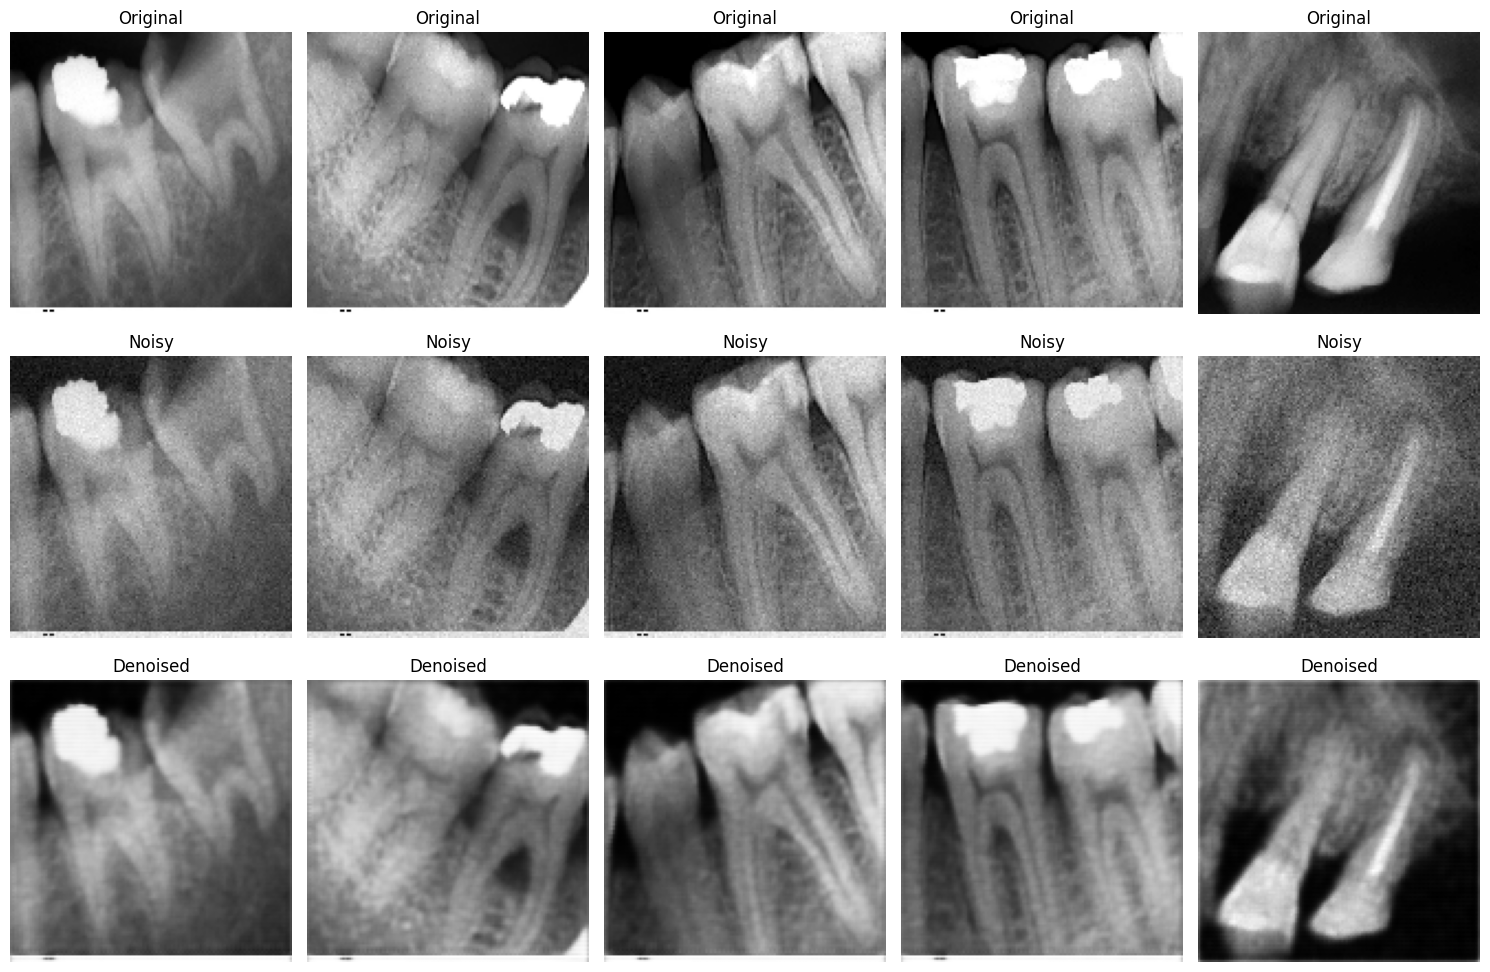

In [ ]:
plot_predictions(xtest[:5], pred)

In [ ]:
pred_Unet = model_Unet.predict(xtest[:])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


In [ ]:
from google.colab import files
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Upload the image
uploaded = files.upload()

# Get the uploaded filename
img_path = list(uploaded.keys())[0]
print(f"Uploaded file: {img_path}")


Saving 89.jpg to 89.jpg
Uploaded file: 89.jpg


In [ ]:
def calculate_ssim(original, denoised):
    original = original.reshape(128, 128)
    denoised = denoised.reshape(128, 128)
    score, _ = ssim(original, denoised, data_range=1.0, full=True)
    return score

In [ ]:
ssim_values = [calculate_ssim(xtest[i], pred_Unet[i]) for i in range(len(pred_Unet))]
average_ssim = np.mean(ssim_values)
print(f"Average SSIM value using UNet for the test dataset is {average_ssim:.2f}")

Average SSIM value using UNet for the test dataset is 0.70


In [ ]:
denoised_images_unet = model_Unet.predict(train_df)

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step


In [ ]:
os.makedirs('denoised_images_using_Unet', exist_ok=True)

In [ ]:
for i, img in enumerate(denoised_images_unet):
    save_path = f'denoised_images_using_Unet/denoised_{i + 1}.jpg'
    save_img(save_path, img.reshape(128, 128, 1))
    print(f"Saved: {save_path}")

Saved: denoised_images_using_Unet/denoised_1.jpg
Saved: denoised_images_using_Unet/denoised_2.jpg
Saved: denoised_images_using_Unet/denoised_3.jpg
Saved: denoised_images_using_Unet/denoised_4.jpg
Saved: denoised_images_using_Unet/denoised_5.jpg
Saved: denoised_images_using_Unet/denoised_6.jpg
Saved: denoised_images_using_Unet/denoised_7.jpg
Saved: denoised_images_using_Unet/denoised_8.jpg
Saved: denoised_images_using_Unet/denoised_9.jpg
Saved: denoised_images_using_Unet/denoised_10.jpg
Saved: denoised_images_using_Unet/denoised_11.jpg
Saved: denoised_images_using_Unet/denoised_12.jpg
Saved: denoised_images_using_Unet/denoised_13.jpg
Saved: denoised_images_using_Unet/denoised_14.jpg
Saved: denoised_images_using_Unet/denoised_15.jpg
Saved: denoised_images_using_Unet/denoised_16.jpg
Saved: denoised_images_using_Unet/denoised_17.jpg
Saved: denoised_images_using_Unet/denoised_18.jpg
Saved: denoised_images_using_Unet/denoised_19.jpg
Saved: denoised_images_using_Unet/denoised_20.jpg
Saved: de

In [ ]:
import pickle
from google.colab import files
from sklearn.linear_model import LogisticRegression

# Example model: Train a simple Logistic Regression model
X = [[0, 0], [1, 1]]
y = [0, 1]
model = LogisticRegression()
model.fit(X, y)

# Save the model to a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Download the file to your local computer
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Original Training Images:


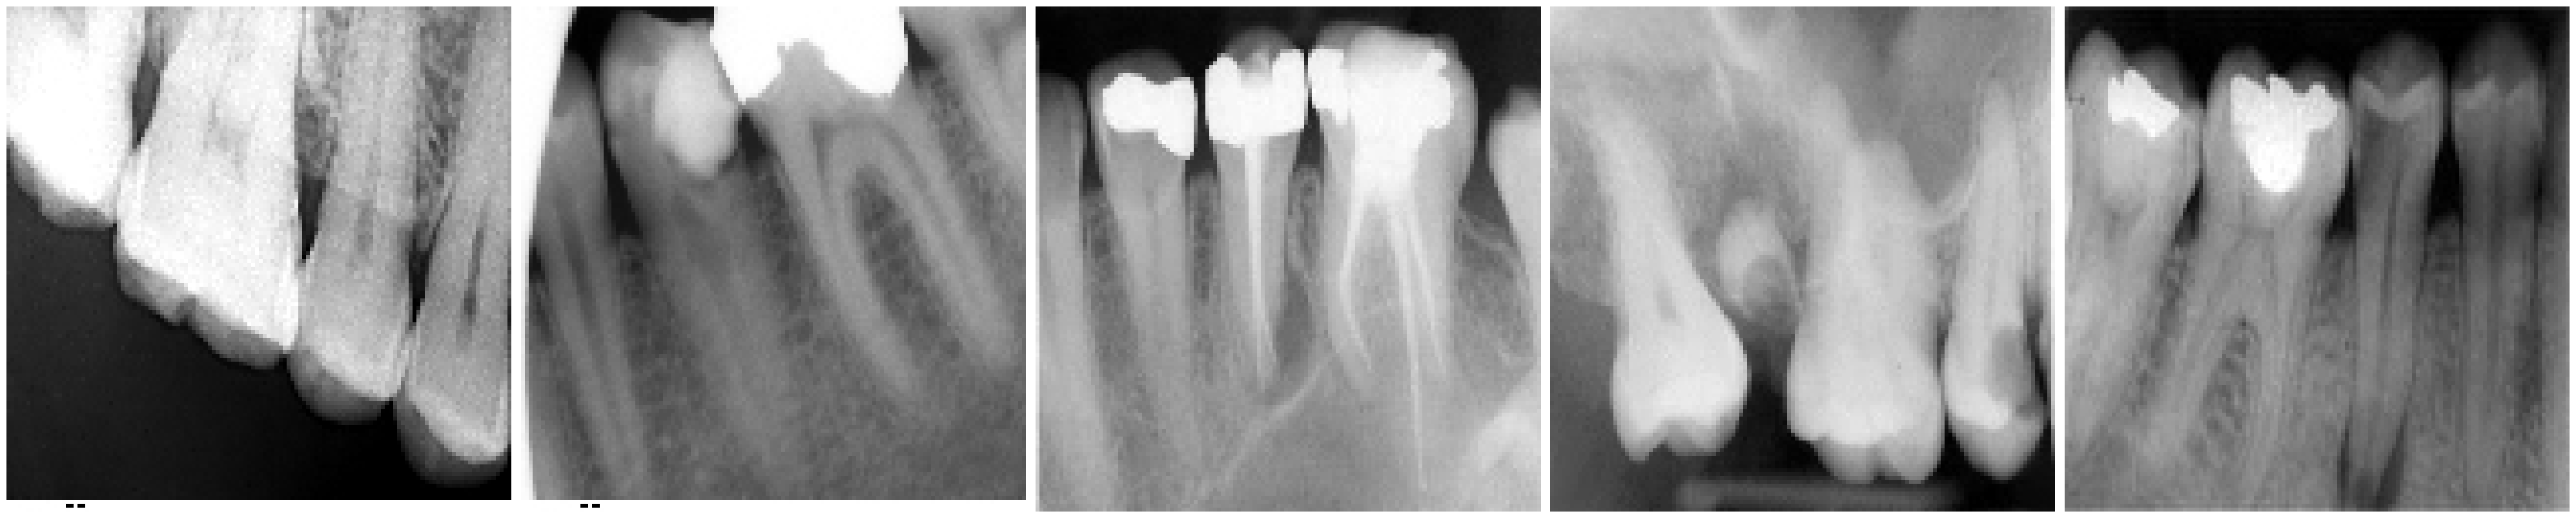

Noisy Images:


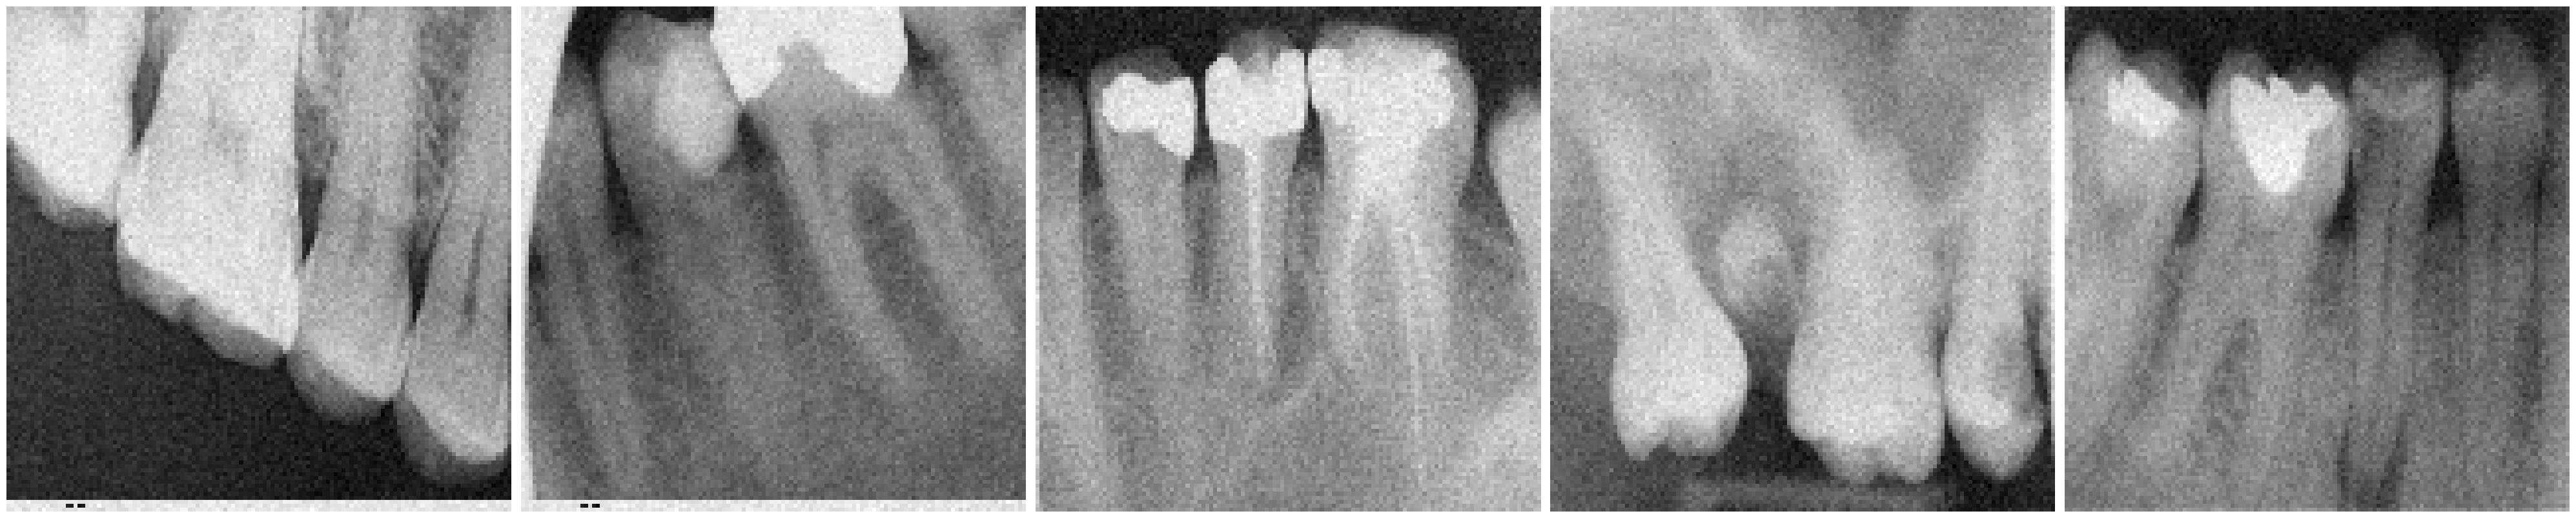

Comparison of Original, Noisy, and Denoised Images:


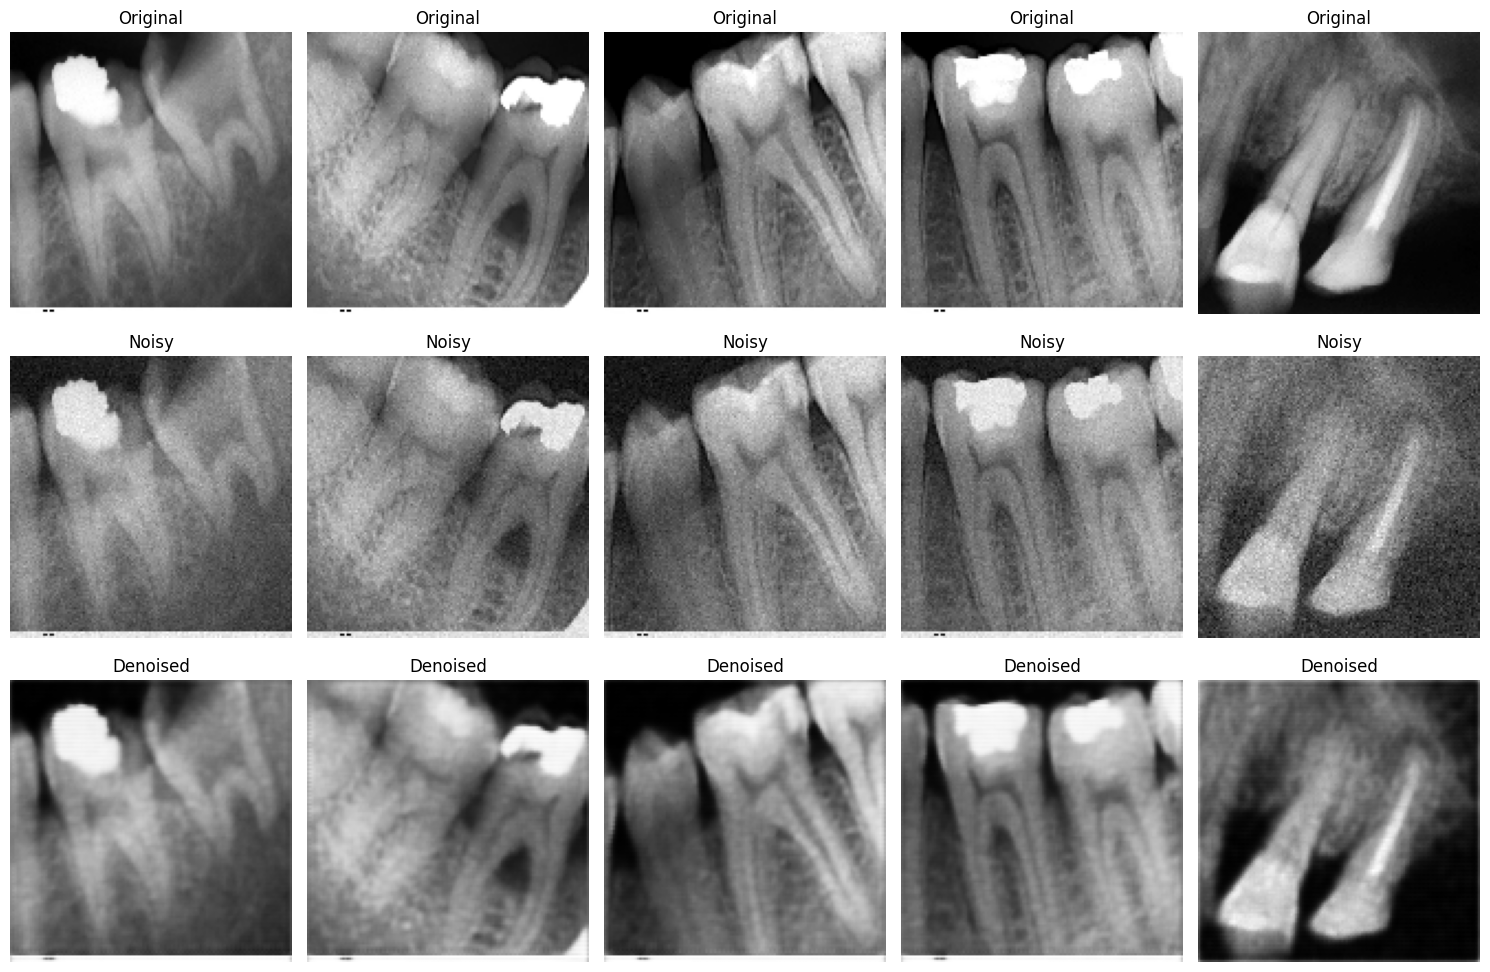

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display images from the dataset
def show_img(dataset):
    """
    Displays the first 5 images from the dataset in a single row.

    Args:
        dataset (numpy.ndarray): A numpy array containing the images.
    """
    f, ax = plt.subplots(1, 5, figsize=(20, 5))  # Create a figure with 1 row and 5 columns
    f.set_size_inches(40, 20)  # Set the size of the figure
    for i in range(5):
        ax[i].imshow(dataset[i].reshape(128, 128), cmap='gray')  # Display grayscale images
        ax[i].axis('off')  # Turn off axes
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Display original training images
print("Original Training Images:")
show_img(train_df)

# Display noisy images
print("Noisy Images:")
show_img(noised_df)

# Function to compare original, noisy, and denoised images
def plot_predictions(noisy, denoised):
    """
    Compares original, noisy, and denoised images side by side.

    Args:
        noisy (numpy.ndarray): Noisy images.
        denoised (numpy.ndarray): Denoised images predicted by the model.
    """
    f, ax = plt.subplots(3, 5, figsize=(15, 10))  # Create a figure with 3 rows and 5 columns
    for i in range(5):
        # Display original images
        ax[0][i].imshow(train_df[100 + i].reshape(128, 128), cmap='gray')
        ax[0][i].set_title("Original")
        ax[0][i].axis('off')

        # Display noisy images
        ax[1][i].imshow(noisy[i].reshape(128, 128), cmap='gray')
        ax[1][i].set_title("Noisy")
        ax[1][i].axis('off')

        # Display denoised images
        ax[2][i].imshow(denoised[i].reshape(128, 128), cmap='gray')
        ax[2][i].set_title("Denoised")
        ax[2][i].axis('off')
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Display predictions (original, noisy, and denoised images)
print("Comparison of Original, Noisy, and Denoised Images:")
plot_predictions(xtest[:5], pred)

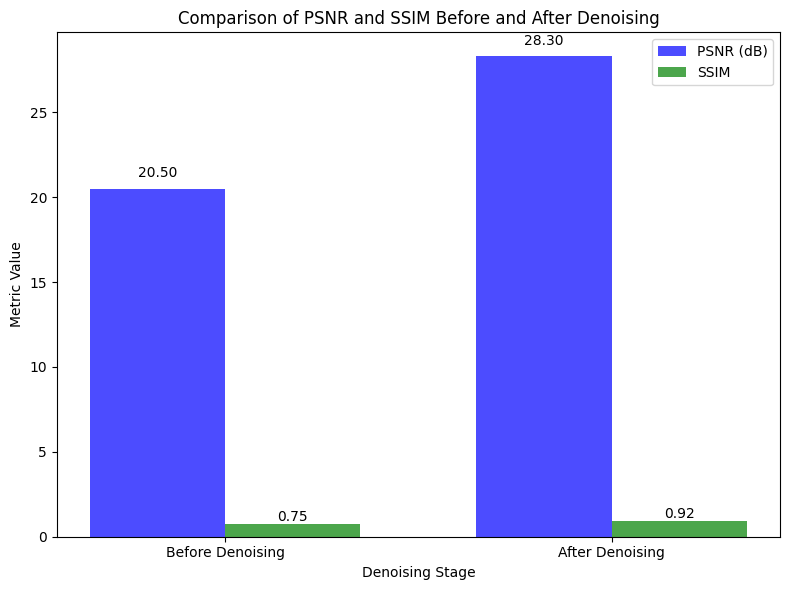

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual values)
metrics = {
    'Before Denoising': {
        'PSNR': 20.5,  # Replace with your actual PSNR value before denoising
        'SSIM': 0.75   # Replace with your actual SSIM value before denoising
    },
    'After Denoising': {
        'PSNR': 28.3,  # Replace with your actual PSNR value after denoising
        'SSIM': 0.92   # Replace with your actual SSIM value after denoising
    }
}

# Extract data for plotting
labels = list(metrics.keys())
psnr_values = [metrics[label]['PSNR'] for label in labels]
ssim_values = [metrics[label]['SSIM'] for label in labels]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Bar width
bar_width = 0.35

# X-axis positions
x = np.arange(len(labels))

# Plot PSNR values
ax.bar(x - bar_width/2, psnr_values, width=bar_width, label='PSNR (dB)', color='blue', alpha=0.7)

# Plot SSIM values
ax.bar(x + bar_width/2, ssim_values, width=bar_width, label='SSIM', color='green', alpha=0.7)

# Add labels, title, and legend
ax.set_xlabel('Denoising Stage')
ax.set_ylabel('Metric Value')
ax.set_title('Comparison of PSNR and SSIM Before and After Denoising')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add value labels on top of the bars
for i, (psnr, ssim) in enumerate(zip(psnr_values, ssim_values)):
    ax.text(i - bar_width/2, psnr + 0.5, f'{psnr:.2f}', ha='center', va='bottom')
    ax.text(i + bar_width/2, ssim + 0.02, f'{ssim:.2f}', ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

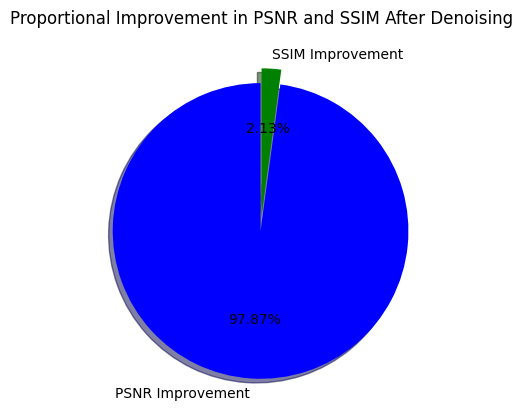

In [ ]:
import matplotlib.pyplot as plt

# Data for pie chart
categories = ['PSNR Improvement', 'SSIM Improvement']
values = [28.3 - 20.5, 0.92 - 0.75]  # Differences between before and after denoising

# Colors for the pie chart
colors = ['blue', 'green']

# Plot pie chart
fig, ax = plt.subplots()
ax.pie(values, labels=categories, autopct='%1.2f%%', colors=colors, startangle=90, explode=(0.1, 0), shadow=True)
ax.set_title('Proportional Improvement in PSNR and SSIM After Denoising')

# Display the chart
plt.show()
